In [1]:
import os
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import Row
from pyspark.sql.types import *       # for datatype conversion
from pyspark.sql.functions import *   # for col() function
import pandas as pd

sc = SparkContext.getOrCreate()

import pyspark.sql.types as typ
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg




spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Hotel_Reviews") \
    .config("spark.executor.memory", '2g') \
    .config('spark.executor.cores', '1') \
    .config('spark.cores.max', '1') \
    .config("spark.driver.memory",'1g') \
    .getOrCreate()

sc = spark.sparkContext
sqlCtx = SQLContext(sc)

In [2]:
df=spark.read.csv("Hotel_Reviews.csv",header=True,inferSchema = True)

In [11]:
top_nation_count = 30
group_nation = df.groupBy("Reviewer_Nationality").count().orderBy(col("count").desc()).limit(top_nation_count)

In [12]:
group_nation_top = group_nation.select('Reviewer_Nationality').rdd.flatMap(lambda x: x).collect()

In [19]:
df2 = df.filter(df.Reviewer_Nationality.isin(group_nation_top))

df3=df2.select("Reviewer_Nationality","Reviewer_Score")

In [14]:
import pyspark.sql.functions as F
agg_df = df3.groupBy("Reviewer_Nationality").agg(F.avg("Reviewer_Score"))

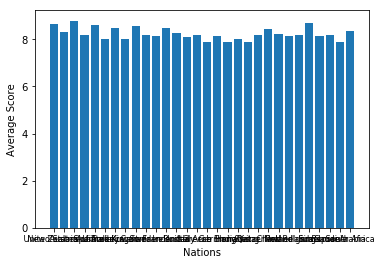

In [15]:
from matplotlib import pyplot 

#Add values to a list (not recommend when you have a huge dataframe)
bla = agg_df.collect()
#create a numeric value for every label
indexes = list(range(len(bla)))

#split words and counts to different lists 
values = [r['avg(Reviewer_Score)'] for r in bla]
labels = [r['Reviewer_Nationality'] for r in bla]

#Plotting
bar_width = 0

pyplot.bar(indexes, values)

#add labels
labelidx = [i + bar_width for i in indexes] 
pyplot.xticks(labelidx, labels, fontsize=8)
pyplot.xlabel("Nations")
pyplot.ylabel("Average Score")
pyplot.show()

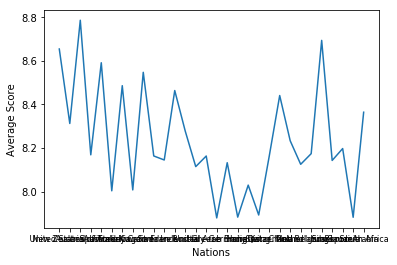

In [16]:
pyplot.plot(indexes, values)

#add labels
labelidx = [i + bar_width for i in indexes] 
pyplot.xticks(labelidx, labels, fontsize=8)
pyplot.xlabel("Nations")
pyplot.ylabel("Average Score")
pyplot.show()

In [17]:
feature_group = ['Reviewer_Nationality']
data_counts = df3.groupBy(feature_group).count().alias("counts")
data_joined = df3.join(data_counts, feature_group)
data_joined2=data_joined.groupBy("Reviewer_Nationality").agg(F.avg("count"))

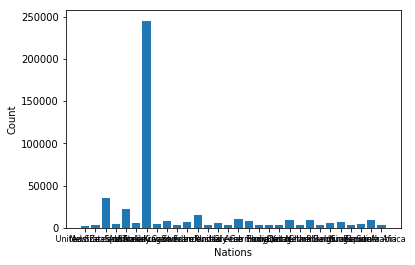

In [18]:
bla2 = data_joined2.collect()
indexes = list(range(len(bla2)))

#split words and counts to different lists 
values = [r['avg(count)'] for r in bla2]
labels = [r['Reviewer_Nationality'] for r in bla2]

#Plotting
bar_width = 0

pyplot.bar(indexes, values)

#add labels
labelidx = [i + bar_width for i in indexes] 
pyplot.xticks(labelidx, labels, fontsize=8)
pyplot.xlabel("Nations")
pyplot.ylabel("Count")
pyplot.show()